<a href="https://colab.research.google.com/github/carinatav/IABD-Carina/blob/main/Somativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv')

In [ ]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  10 non-null     object 
 1   rating        10 non-null     float64
 2   rating_count  10 non-null     int64  
 3   purchased     10 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 452.0+ bytes
None
Estatísticas descritivas:
          rating  rating_count  purchased
count  10.000000     10.000000  10.000000
mean    3.933000   2270.700000   0.600000
std     0.668182   1624.300058   0.516398
min     3.040000     29.000000   0.000000
25%     3.340000   1233.250000   0.000000
50%     3.925000   1757.500000   1.000000
75%     4.412500   3745.000000   1.000000
max     5.000000   4738.000000   1.000000


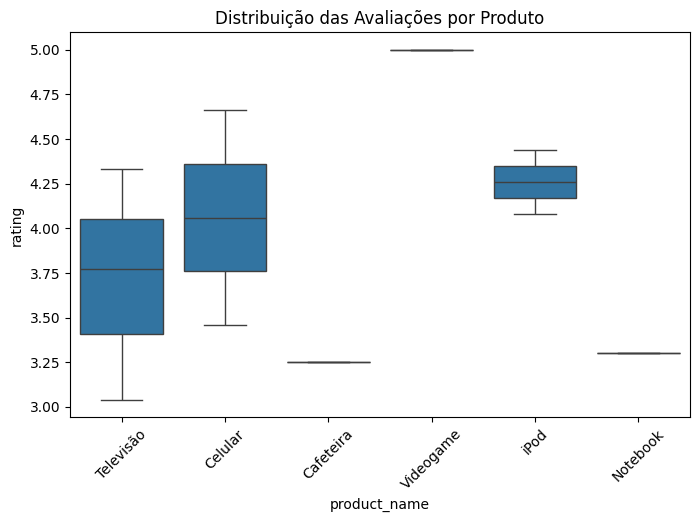

In [ ]:
print("Informações gerais:")
print(df.info())
print("Estatísticas descritivas:")
print(df.describe())

# Boxplot para visualizar notas e possíveis outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='product_name', y='rating', data=df)
plt.title('Distribuição das Avaliações por Produto')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df, columns=['product_name'], drop_first=True)

# Verificar se há valores ausentes
print("Valores nulos:")
print(df_encoded.isnull().sum())

Valores nulos:
rating                    0
rating_count              0
purchased                 0
product_name_Celular      0
product_name_Notebook     0
product_name_Televisão    0
product_name_Videogame    0
product_name_iPod         0
dtype: int64


In [ ]:
X = df_encoded.drop('purchased', axis=1)
y = df_encoded['purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = DecisionTreeClassifier(random_state=42)

In [ ]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

print("Avaliação do Modelo:")
print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matriz de Confusão:")
print(matriz)

Avaliação do Modelo:
Acurácia: 0.50
Precisão: 0.50
Recall: 1.00
F1-Score: 0.67

Matriz de Confusão:
[[0 1]
 [0 1]]


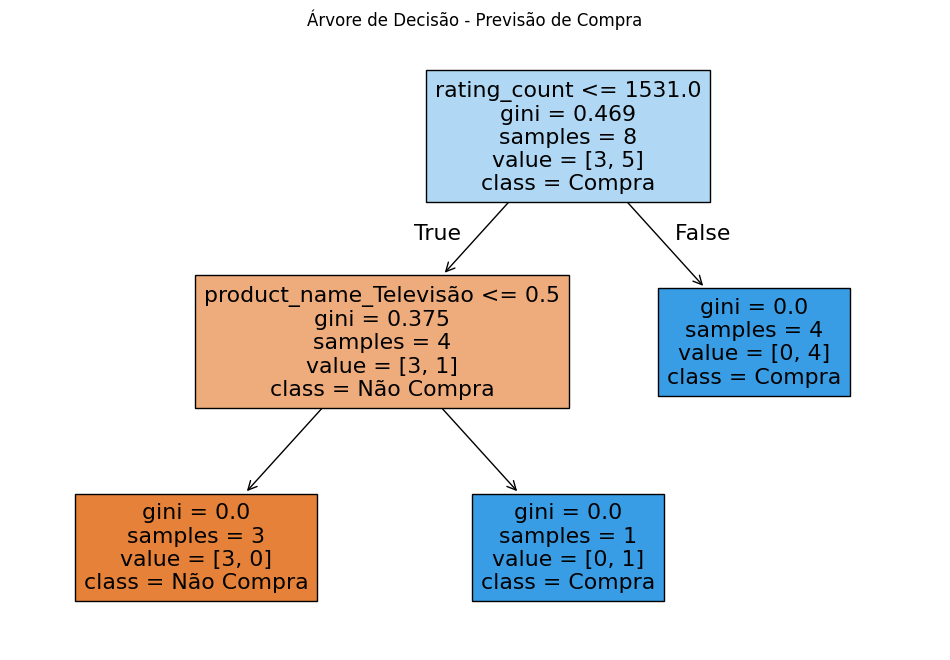

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['Não Compra', 'Compra'])
plt.title('Árvore de Decisão - Previsão de Compra')
plt.show()